In [17]:
'''import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.pairwise import cosine_distances, euclidean_distances
'''

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

import pandas
from scipy.stats import norm, spearmanr
import lime
import pandas as pd
import lime.lime_tabular
from sklearn.datasets import make_moons, make_circles, make_classification
import scipy
#import scikit_posthocs
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity, kernel_metrics
from tabulate import tabulate
import sys

import seaborn as sns

In [6]:
!pip install pandas scipy scikit-learn lime shap scikit_posthocs seaborn tabulate

In [7]:
phi_1 = [0.21, 0.1, 0.32]
phi_2 = [0.21, 0.3, 0.12]
lambda_1 = [0.32, 0.2, 0.42]

In [8]:
def euc_similarity(x, y):
    return 1 / (1 +  np.linalg.norm(np.array(x)-np.array(y)))

In [9]:
cosine_similarity([phi_1], [lambda_1])[0], cosine_similarity([phi_2], [lambda_1])[0]

(array([0.99209538]), array([0.81624508]))

In [10]:
euc_similarity(phi_1, lambda_1), euc_similarity(phi_2, lambda_1)

(0.8480579309105392, 0.7491683963783488)

In [11]:
spearmanr(phi_1, lambda_1).correlation, spearmanr(phi_2, lambda_1).correlation

(1.0, -1.0)

### Tabular

In [13]:
loca_exp_pime = {
    'lreg':np.load('/tf/tabular/pima_indians/exps_v10/standard/local_lreg_exp_standard.npy'),
    'nbayes': np.load('/tf/tabular/pima_indians/exps_v10/standard/local_nbayes_exp_standard.npy')
}
#local_lreg_exp_pima = np.load('/tf/tabular/pima_indians/exps_v4/local_lreg_exp_standard.npy')
#local_nbayes_exp_pima = np.load('/tf/tabular/pima_indians/exps_v4/local_nbayes_exp_standard.npy')

lime_exp_lreg_odds_pima = np.load('/tf/tabular/data/pima_indians/exps_v10/standard/lime_exp_lreg_odds_standard.npy')
shap_exp_lreg_odds_pima = np.load('/tf/tabular/data/pima_indians/exps_v10/standard/shap_exp_lreg_odds_standard.npy')
permute_lreg_odds_pima = np.load('/tf/tabular/pima_indians/exps_v10/standard/permute_exp_lreg_odds_standard.npy')

lime_exp_nbayes_odds_pima = np.load('/tf/tabular/data/pima_indians/exps_v10/standard/lime_exp_nbayes_odds_standard.npy')
shap_exp_nbayes_odds_pima = np.load('/tf/tabular/data/pima_indians/exps_v10/standard/shap_exp_nbayes_odds_standard.npy')
permute_exp_nbayes_odds_pima = np.load('/tf/tabular/data/pima_indians/exps_v10/standard/permute_exp_nbayes_odds_standard.npy')

FileNotFoundError: [Errno 2] No such file or directory: '/tf/tabular/pima_indians/exps_v10/standard/local_lreg_exp_standard.npy'

In [34]:
features = np.array(['Pregnancies', 'Glucose', 'BP', 'Skin Thickness', 'Insulin', 'BMI', 'Pedigree', 'Age'])

In [35]:
idx_instance = 3

In [46]:
#exps = [loca_exp_pime['lreg'][idx_instance]]
exps = []
exps.extend([lime_exp_lreg_odds_pima[idx_instance], shap_exp_lreg_odds_pima[idx_instance], permute_lreg_odds_pima[idx_instance]])
exps.extend([lime_exp_nbayes_odds_pima[idx_instance], shap_exp_nbayes_odds_pima[idx_instance], permute_exp_nbayes_odds_pima[idx_instance]])
exps.extend([loca_exp_pime['lreg'][idx_instance]])
exps = pd.DataFrame(exps)
exps.columns = features

In [47]:
#titles = ['True Importance Scores (LR)', 'LIME (LR)', 'SHAP (LR)', 'LPI (LR)', 
#          'Model-Intrinsic (NB)', 'LIME (NB)', 'SHAP (NB)', 'LPI (NB)' ]
titles = ['LIME (LR)', 'SHAP (LR)', 'LPI (LR)', 
          'Model-Intrinsic (NB)', 'LIME (NB)', 'SHAP (NB)', 'LPI (NB)' ]
exp_colors = ['#5F8BE9', '#C4A705', '#E97439', '#65ED99']

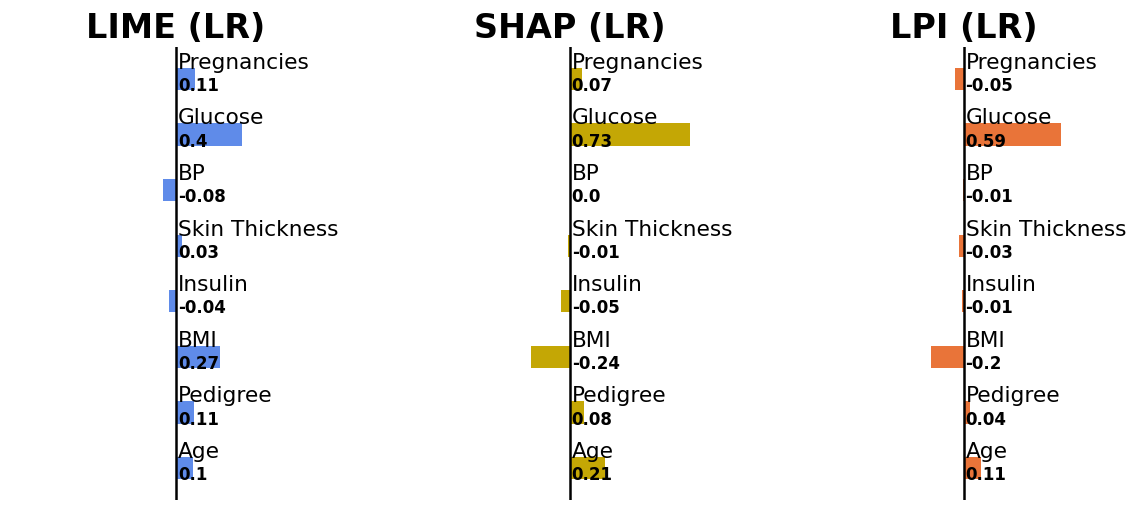

In [50]:
#fig, ax = plt.subplots(2, 4, figsize=(20, 10), sharey=True, dpi=120)
fig, ax = plt.subplots(1, 3, figsize=(12, 5), sharey=True, dpi=120)

ax = ax.ravel()
y_pos = np.arange(len(features))

ax[0].invert_yaxis() 

for i in range(3):    
    ax[i].set_title(titles[i], fontsize=20, fontweight='bold')
    ax[i].set_xticks([])
    ax[i].set_xticklabels([])
    #ax[i].set_ylabel('', labelpad=25)
    ax[i].tick_params(left = False, bottom = False)
    #ax[i].set_yticks(np.arange(len(features)))
    #ax[i].set_yticklabels(features, fontsize=17)
    ax[i].set_yticklabels([])
    ax[i].set_xlim([-1, 1])
    ax[i].barh(y_pos, exps.iloc[i], align='center', height=0.4, color=exp_colors[i % 4])
    #ax[i].set_yticks(y_pos)
    #ax[i].set_yticklabels(features, fontsize= 18)
    ax[i].axvline(x=0, c='black')

    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    
    for j in range(len(exps.iloc[i + 4])):
        
        if exps.iloc[i, j] < 0:
            x_pos_ = 0.2
        else: 
            x_pos_ = exps.iloc[i + 4, j] + 0.1
        ax[i].text(0.01, j + 0.2, np.round(exps.iloc[i, j], 2), color='black', fontweight='bold', fontsize=10)
        ax[i].text(0.01, j - 0.2, features[j], color='black',  fontsize=13)
        
plt.savefig("exp_LR_no_truth.eps", bbox_inches='tight')

In [13]:
local_lreg_exp_pima = np.load('/tf/tabular/pima_indians/exps/local_lreg_exp_robust.npy')[:, :, 0]
lime_exp_lreg_proba_pima = np.load('/tf/tabular/pima_indians/exps/lime_exp_lreg_proba_robust.npy')
shap_exp_lreg_prob_pima = np.load('/tf/tabular/pima_indians/exps/shap_exp_lreg_prob_robust.npy')
lreg_permute_pima = np.load('/tf/tabular/pima_indians/exps/lreg_permute_robust.npy')

In [14]:
explanations = [lime_exp_lreg_proba_pima[idx_instance], shap_exp_lreg_prob_pima[idx_instance], lreg_permute_pima[idx_instance]]
rank_corr_example = []
for i in range(len(explanations)):
    exp_i = explanations[i]
    rank_corr_example.append(spearmanr(exp_i, local_lreg_exp_pima[idx_instance]).correlation)    

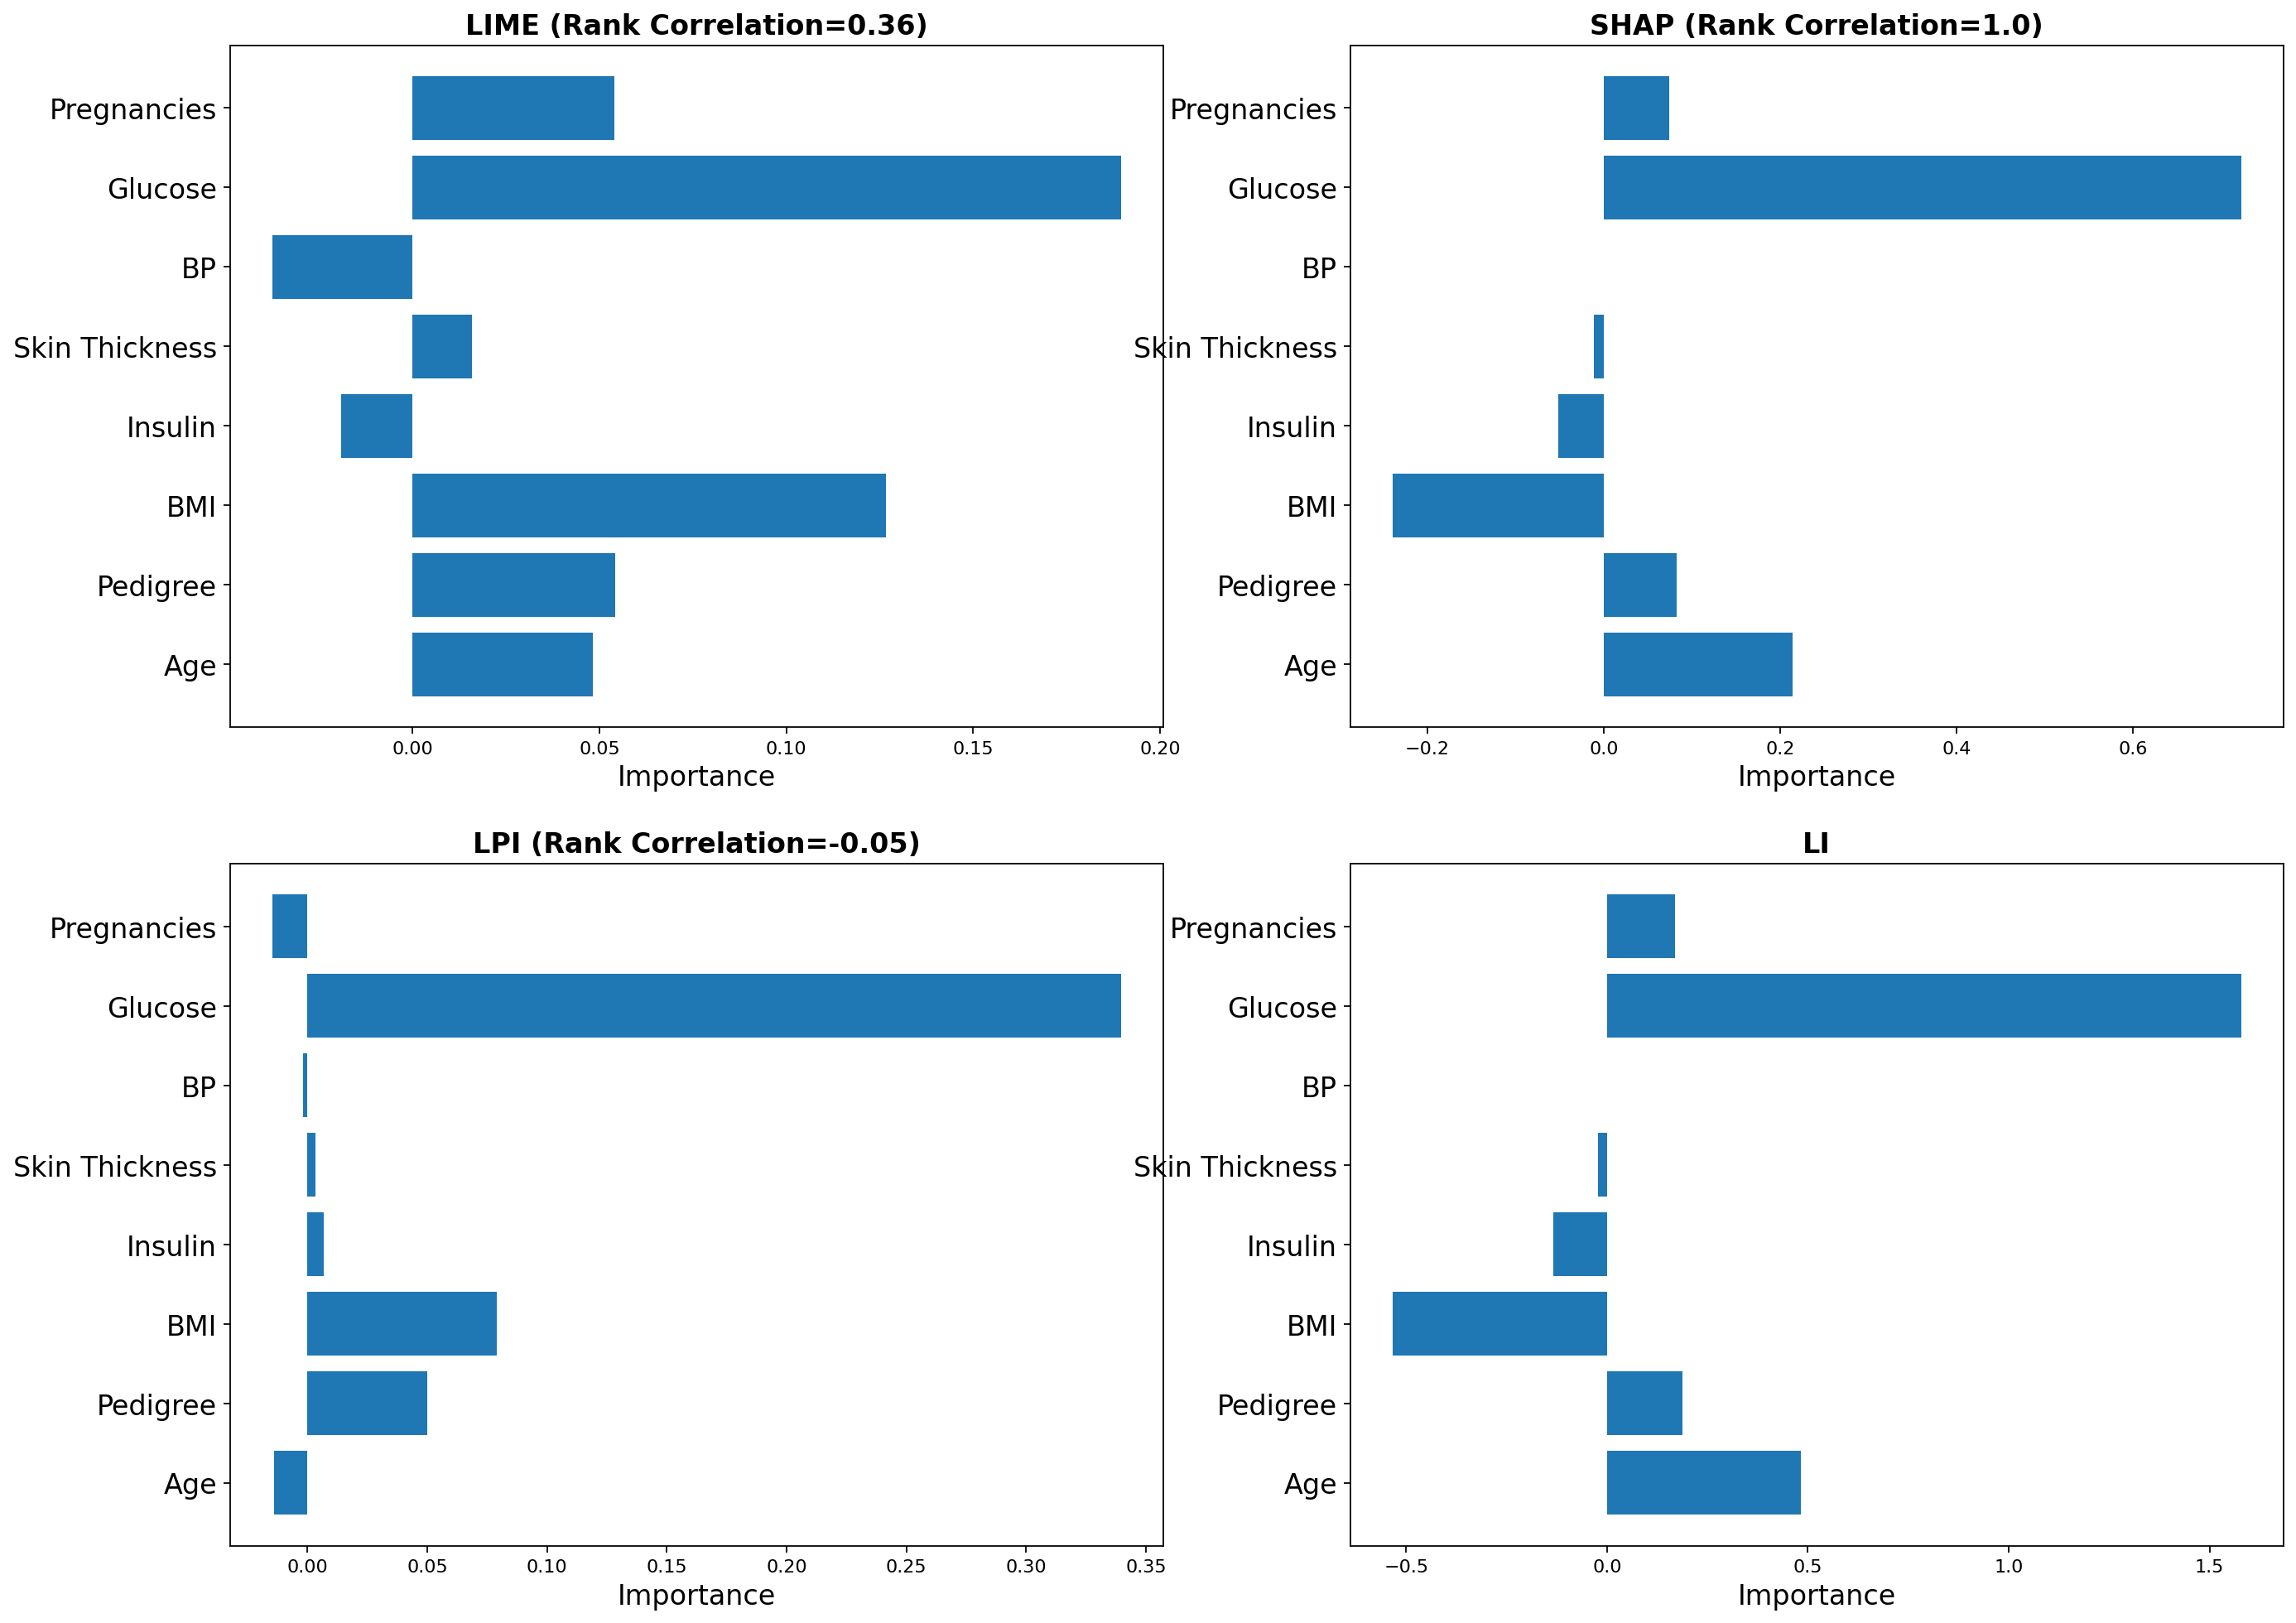

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15), dpi=160)
ax = ax.ravel()

exps_list = [lime_exp_lreg_proba_pima[idx_instance], shap_exp_lreg_prob_pima[idx_instance], lreg_permute_pima[idx_instance], local_lreg_exp_pima[idx_instance]]
exps_list_title = ['LIME', 'SHAP', 'LPI', 'LI']

for i in range(len(exps_list)):
    y_pos = np.arange(len(features))
    ax[i].barh(y_pos, exps_list[i], align='center')
    ax[i].set_yticks(y_pos)
    ax[i].set_yticklabels(features,fontsize= 15)
    ax[i].invert_yaxis()  # labels read top-to-bottom
    ax[i].set_xlabel('Importance', fontsize= 15)
    
    if (i!= 3):
        ax[i].set_title('{} (Rank Correlation={})'.format(exps_list_title[i], np.round(rank_corr_example[i], 2)), fontweight='bold', fontsize= 15)
    else: 
         ax[i].set_title(exps_list_title[i], fontsize= 15, fontweight='bold')               
        

fig.savefig('./pimal_explanations_robust.png')
plt.show()

In [111]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_kernel_example = []
for i in range(len(explanations)):
    exp_i = explanations[i]
    cosine_kernel_example.append(cosine_similarity(exp_i.reshape(1, -1), local_lreg_exp_pima[idx_instance].reshape(1, -1))[0][0])    

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15), dpi=160)
ax = ax.ravel()

for i in range(len(exps_list)):
    y_pos = np.arange(len(features))
    ax[i].barh(y_pos, exps_list[i], align='center')
    ax[i].set_yticks(y_pos)
    ax[i].set_yticklabels(features, fontsize= 15)
    ax[i].invert_yaxis()  # labels read top-to-bottom
    ax[i].set_xlabel('Importance', fontsize= 15)
    
    if (i!= 3):
        ax[i].set_title('{} (Cosine Similarity={})'.format(exps_list_title[i], np.round(cosine_kernel_example[i], 2)), fontsize= 15, fontweight='bold')
    else: 
         ax[i].set_title(exps_list_title[i], fontsize= 15, fontweight='bold')               


In [138]:
from scipy.spatial import distance
from scipy.stats import kendalltau

a = np.array([1.3, 4.2, -2.2, 3.4, 5.5])
b = np.array([-1.5,9.5,-5,4.1,10.2])
c = np.array([-2.5,-9.5,1,-7.2,-10.2])

In [147]:
print(spearmanr(a,b).correlation, 
kendalltau(a,b).correlation,
cosine_similarity(a.reshape(1, -1), b.reshape(1, -1))[0][0])

0.9999999999999999 0.9999999999999999 0.9488481841149778


In [145]:
print(spearmanr(a,c).correlation, 
kendalltau(a,c).correlation,
cosine_similarity(a.reshape(1, -1), 
c.reshape(1, -1))[0][0])

-0.9999999999999999 -0.9999999999999999 -0.9739504931987776


In [148]:
d = np.array([1,2,3,4])
e = np.array([5,6,7,8])
f = np.array([5,6,7,88])

In [149]:
print(spearmanr(d,e).correlation, 
kendalltau(d,e).correlation,
cosine_similarity(d.reshape(1, -1), e.reshape(1, -1))[0][0])

1.0 1.0 0.9688639316269662


In [150]:
print(spearmanr(d,f).correlation, 
kendalltau(d,f).correlation,
cosine_similarity(d.reshape(1, -1), f.reshape(1, -1))[0][0])

1.0 1.0 0.8034494008016849


In [96]:
local_lreg_exp_adult = np.load('/tf/tabular/adult/exps/local_lreg_exp_original.npy')[:, :, 0]
lime_exp_lreg_proba_adult = np.load('/tf/tabular/adult/exps/lime_exp_lreg_proba_original.npy')
shap_exp_lreg_prob_adult = np.load('/tf/tabular/adult/exps/shap_exp_lreg_prob_original.npy')
lreg_permute_adult = np.load('/tf/tabular/adult/exps/lreg_permute_original.npy')

In [97]:
rank_corr_example = {'lime': [], 'shap': [], 'lpr': []}
for i in range(len(local_lreg_exp_adult)):
    rank_corr_example['lime'].append(spearmanr(lime_exp_lreg_proba_adult[i], local_lreg_exp_adult[i]).correlation)
    rank_corr_example['shap'].append(spearmanr(shap_exp_lreg_prob_adult[i], local_lreg_exp_adult[i]).correlation)    
    rank_corr_example['lpi'].append(spearmanr(lreg_permute_adult[i], local_lreg_exp_adult[i]).correlation)    

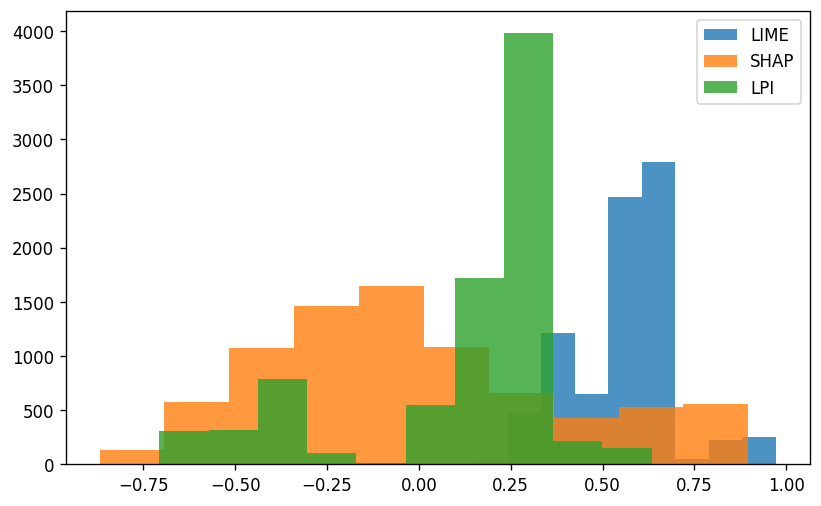

In [109]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5), dpi=120)

ax.hist(rank_corr_example['lime'], label='LIME', alpha=0.8)
ax.hist(rank_corr_example['shap'], label='SHAP', alpha=0.8)
ax.hist(rank_corr_example['lpr'], label='LPI', alpha=0.8)
ax.legend()
plt.savefig('adult_density.png')
plt.show()

### 2-D

In [79]:
X, y, features = np.load('./2d/moons/data_original.npy', allow_pickle=True)
lime_exp_lreg_proba = np.load('./2d/moons/exps/lime_exp_lreg_proba_original.npy')
shap_exp_lreg_prob = np.load('./2d/moons/exps/shap_exp_lreg_prob_original.npy')
lreg_permute = np.load('./2d/moons/exps/lreg_permute_original.npy')
local_lreg_exp = np.load('./2d/moons/exps/local_lreg_exp_original.npy')

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [81]:
lreg = LogisticRegression(random_state=0,  solver='lbfgs', fit_intercept=False).fit(X, y)
gbayes = GaussianNB().fit(X_train, y_train)

In [82]:
h = .02
x_min, x_max = X_test[:, 0].min() - .5, X_test[:, 0].max() + .5
y_min, y_max = X_test[:, 1].min() - .5, X_test[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
Z_lreg = lreg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z_lreg = Z_lreg.reshape(xx.shape)
Z_bayes = gbayes.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)

In [83]:
explained_class_lreg = lreg.predict(X_test)
explained_class_nbayes = gbayes.predict(X_test)

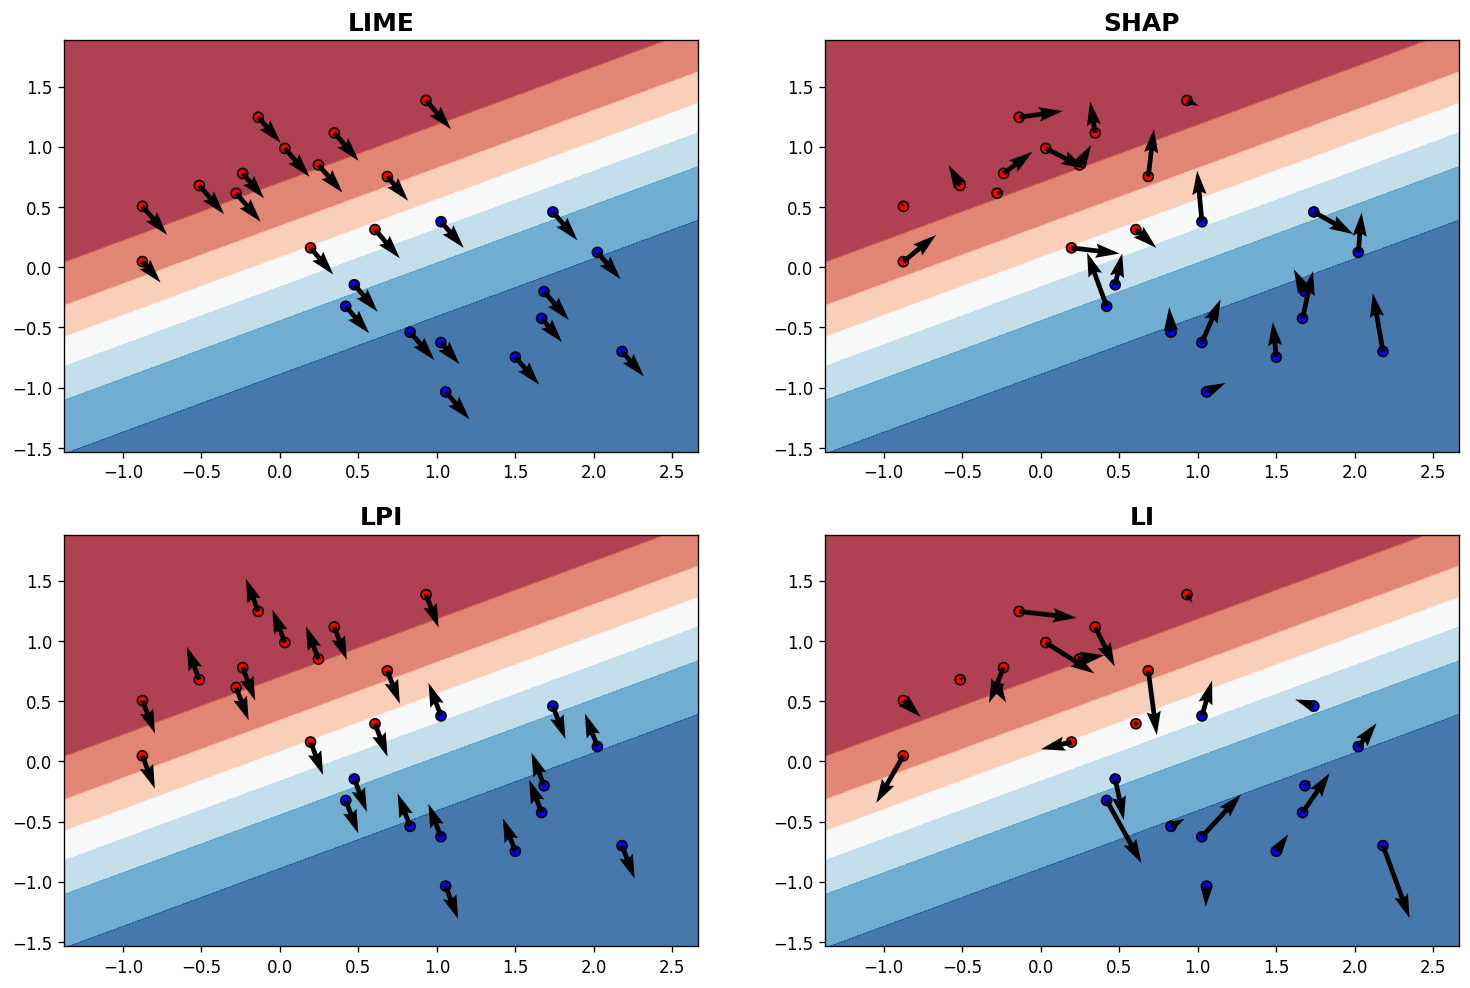

In [172]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10), dpi=120)
ax = ax.ravel()

ax[0].contourf(xx, yy, Z_lreg, cmap=cm, alpha=.8)

# Plot the training points
ax[0].scatter(X_test[:, 0], X_test[:, 1], c=explained_class_lreg, cmap=cm_bright,
           edgecolors='k')
ax[0].quiver(X_test[:, 0], X_test[:, 1], lime_exp_lreg_proba[:, 0], lime_exp_lreg_proba[:, 1])
ax[0].set_title('LIME', fontsize= 15, fontweight='bold')

ax[1].contourf(xx, yy, Z_lreg, cmap=cm, alpha=.8)
ax[1].scatter(X_test[:, 0], X_test[:, 1], c=explained_class_lreg, cmap=cm_bright,edgecolors='k')
ax[1].quiver(X_test[:, 0], X_test[:, 1], shap_exp_lreg_prob[:, 0], shap_exp_lreg_prob[:, 1])    
ax[1].set_title('SHAP', fontsize= 15, fontweight='bold')

ax[2].contourf(xx, yy, Z_lreg, cmap=cm, alpha=.8)
ax[2].scatter(X_test[:, 0], X_test[:, 1], c=explained_class_lreg, cmap=cm_bright,edgecolors='k')
ax[2].quiver(X_test[:, 0], X_test[:, 1], lreg_permute[:, 0], lreg_permute[:, 1])
ax[2].set_title('LPI', fontsize= 15, fontweight='bold')

ax[3].contourf(xx, yy, Z_lreg, cmap=cm, alpha=.8)
ax[3].scatter(X_test[:, 0], X_test[:, 1], c=explained_class_lreg, cmap=cm_bright,edgecolors='k')
ax[3].quiver(X_test[:, 0], X_test[:, 1], local_lreg_exp[:, 0], local_lreg_exp[:, 1])  
ax[3].set_title('LI', fontsize= 15, fontweight='bold')

#fig.suptitle('Logistic Regression')
plt.savefig('./logistic_circles.png')
plt.show()

In [73]:
X, y, features = np.load('./2d/circles/data_original.npy', allow_pickle=True)
lime_exp_nbayes_proba = np.load('./2d/circles/exps/lime_exp_bayes_proba_original.npy')
shap_exp_nbayes_prob = np.load('./2d/circles/exps/shap_exp_nbayes_prob_original.npy')
nbayes_permute = np.load('./2d/circles/exps/nbayes_permute_original.npy')
local_nbayes_exp = np.load('./2d/circles/exps/local_nbayes_exp_original.npy')

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [75]:
lreg = LogisticRegression(random_state=0,  solver='lbfgs', fit_intercept=False).fit(X, y)
gbayes = GaussianNB().fit(X_train, y_train)

In [76]:
h = .02
x_min, x_max = X_test[:, 0].min() - .5, X_test[:, 0].max() + .5
y_min, y_max = X_test[:, 1].min() - .5, X_test[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
Z_lreg = lreg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z_lreg = Z_lreg.reshape(xx.shape)
Z_bayes = gbayes.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)

In [77]:
explained_class_lreg = lreg.predict(X_test)
explained_class_nbayes = gbayes.predict(X_test)

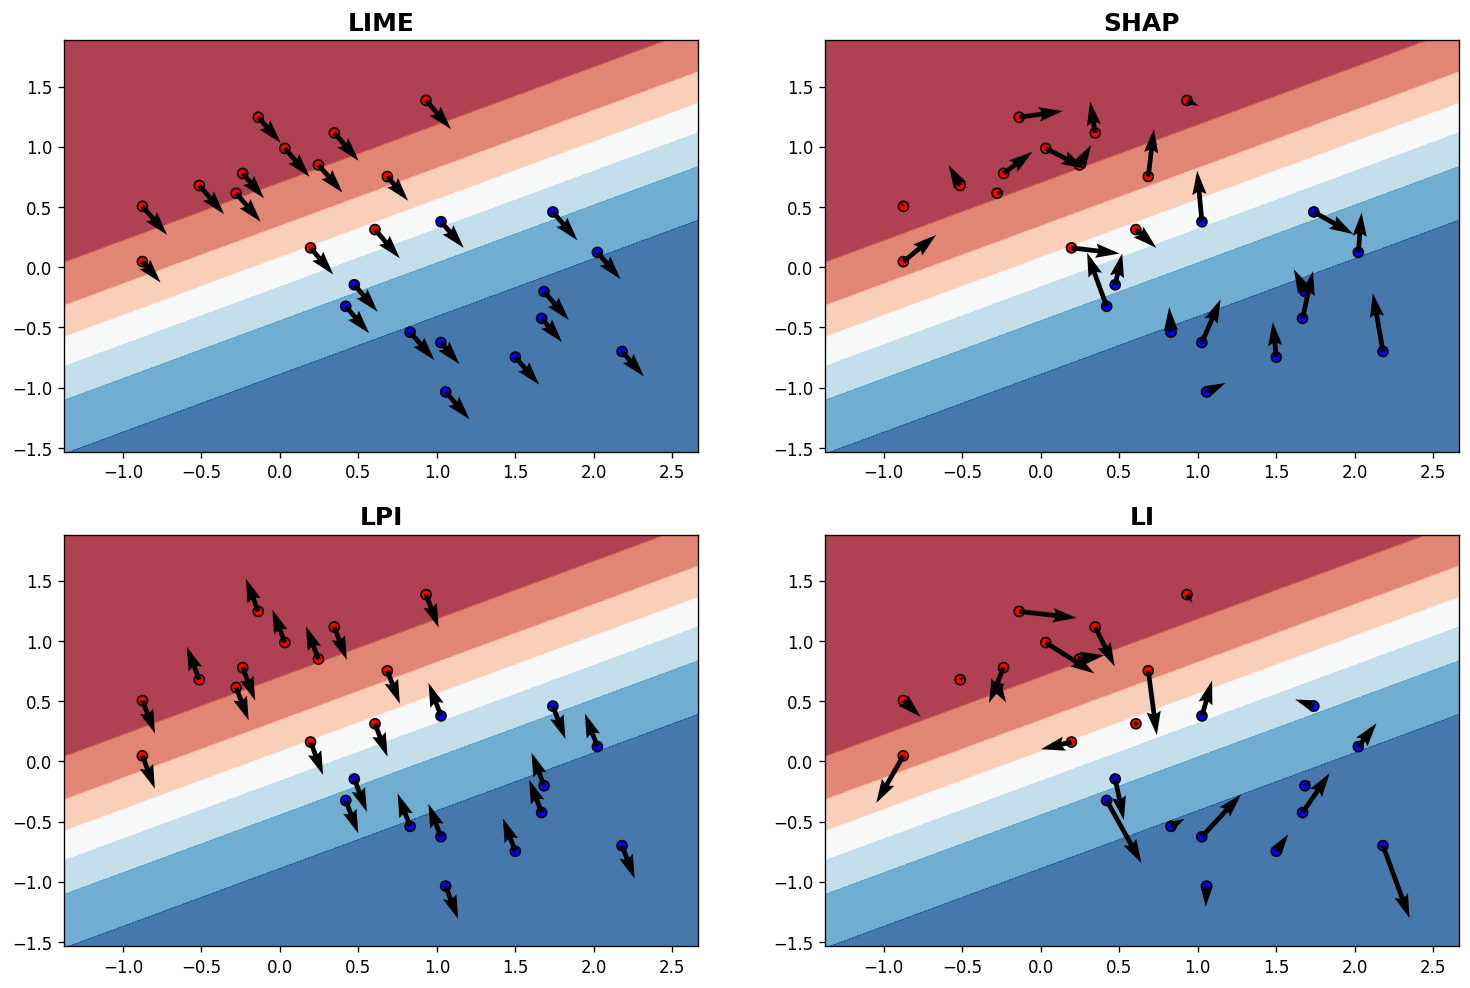

In [173]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10), dpi=120)
ax = ax.ravel()

ax[0].contourf(xx, yy, Z_lreg, cmap=cm, alpha=.8)

ax[0].scatter(X_test[:, 0], X_test[:, 1], c=explained_class_lreg, cmap=cm_bright,
           edgecolors='k')
ax[0].quiver(X_test[:, 0], X_test[:, 1], lime_exp_lreg_proba[:, 0], lime_exp_lreg_proba[:, 1])
ax[0].set_title('LIME', fontsize= 15, fontweight='bold')

ax[1].contourf(xx, yy, Z_lreg, cmap=cm, alpha=.8)
ax[1].scatter(X_test[:, 0], X_test[:, 1], c=explained_class_lreg, cmap=cm_bright,edgecolors='k')
ax[1].quiver(X_test[:, 0], X_test[:, 1], shap_exp_lreg_prob[:, 0], shap_exp_lreg_prob[:, 1])    
ax[1].set_title('SHAP', fontsize= 15, fontweight='bold')

ax[2].contourf(xx, yy, Z_lreg, cmap=cm, alpha=.8)
ax[2].scatter(X_test[:, 0], X_test[:, 1], c=explained_class_lreg, cmap=cm_bright,edgecolors='k')
ax[2].quiver(X_test[:, 0], X_test[:, 1], lreg_permute[:, 0], lreg_permute[:, 1])
ax[2].set_title('LPI', fontsize= 15, fontweight='bold')

ax[3].contourf(xx, yy, Z_lreg, cmap=cm, alpha=.8)
ax[3].scatter(X_test[:, 0], X_test[:, 1], c=explained_class_lreg, cmap=cm_bright,edgecolors='k')
ax[3].quiver(X_test[:, 0], X_test[:, 1], local_lreg_exp[:, 0], local_lreg_exp[:, 1])  
ax[3].set_title('LI', fontsize= 15, fontweight='bold')

plt.savefig('./naive_bayes_moons.png')
plt.show()

In [1]:
### new viz

In [14]:
from sklearn.base import TransformerMixin
class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        if type(X) == scipy.sparse.csr.csr_matrix:    
            return X.todense()
        else: 
            return X
        

In [22]:
import os
import joblib
BASE_PATH = os.getcwd() +'/tabular/data'
data_key = 'pima_indians'
preproc = 'standard'
model = 'lreg'
exp_model = 'lime'
model_object = joblib.load('{}/{}/{}/{}_v1.joblib'.format(BASE_PATH, data_key, preproc, model))
local_exp = np.load('{}/{}/{}/exp_v7/gt_exp_{}_{}.npy'.format(BASE_PATH, data_key, preproc, 
                                                                  model, preproc), allow_pickle=True)

In [55]:
exps = [model_object['lreg'].coef_[0], local_exp[0]]

In [39]:
diabetes = pd.read_csv('{}/pima_indians/diabetes.csv'.format(BASE_PATH))
features = np.array(diabetes.columns)[:-1]

In [61]:
titles = ['Global Explanation', 'MIAS Scores']

In [62]:
exp_colors = ['#ffb3ba', '#baffc9']

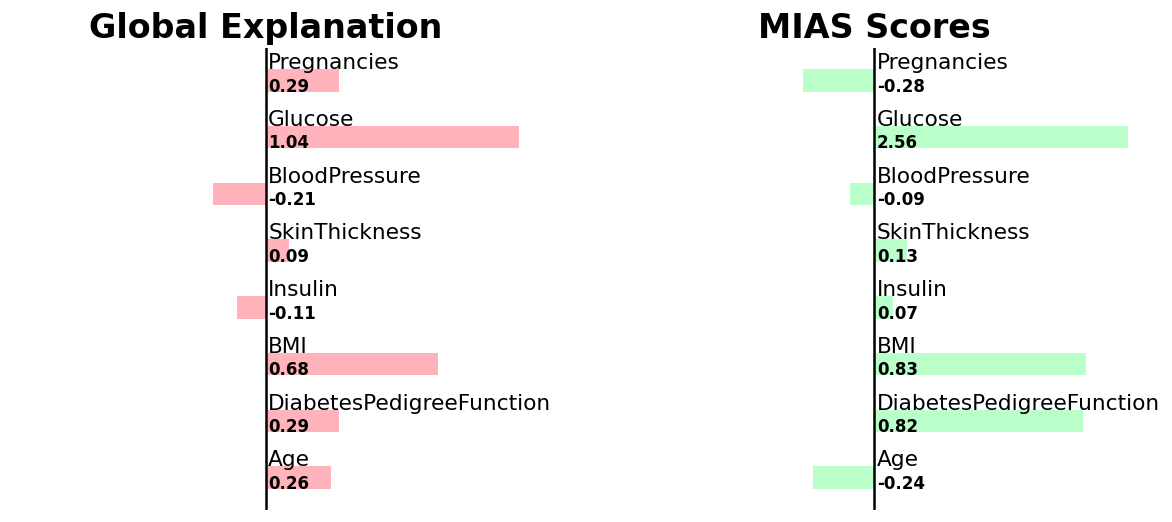

In [63]:
#fig, ax = plt.subplots(2, 4, figsize=(20, 10), sharey=True, dpi=120)
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True, dpi=120)

ax = ax.ravel()
y_pos = np.arange(len(features))

ax[0].invert_yaxis() 

for i in range(2):    
    ax[i].set_title(titles[i], fontsize=20, fontweight='bold')
    ax[i].set_xticks([])
    ax[i].set_xticklabels([])
    #ax[i].set_ylabel('', labelpad=25)
    ax[i].tick_params(left = False, bottom = False)
    #ax[i].set_yticks(np.arange(len(features)))
    #ax[i].set_yticklabels(features, fontsize=17)
    ax[i].set_yticklabels([])
    ax[i].set_xlim([-1, 1])
    #print(y_pos, exps[i])
    ax[i].barh(y_pos, exps[i], align='center', height=0.4, color=exp_colors[i])
    #ax[i].set_yticks(y_pos)
    #ax[i].set_yticklabels(features, fontsize= 18)
    ax[i].axvline(x=0, c='black')

    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    
    for j in range(len(exps[i])):
        if exps[i][j] < 0:
            x_pos_ = 0.2
        else: 
            x_pos_ = exps[i][j] + 0.1
        ax[i].text(0.01, j + 0.2, np.round(exps[i][j], 2), color='black', fontweight='bold', fontsize=10)
        ax[i].text(0.01, j - 0.2, features[j], color='black',  fontsize=13)
        
plt.savefig("global_vs_local.eps", bbox_inches='tight')